# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
dataset = pd.read_csv("C:/Users/Dell/Documents/covid_worldwide.csv")

In [3]:
dataset.head(6)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"


In [4]:
dataset.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


# Information of the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [6]:
dataset.describe()

,Serial Number
count,231.000000
mean,116.000000
std,66.828138
min,1.000000
25%,58.500000
50%,116.000000
75%,173.500000
max,231.000000


In [7]:
dataset.drop('Serial Number', axis=1, inplace=True)

In [8]:
dataset.describe(include = 'object')

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231,231,225,210,212,213,228
unique,231,231,213,210,181,212,228
top,USA,"104,196,861",2,"101,322,779",0,"78,646","334,805,269"
freq,1,1,3,1,8,2,1


##### Changing the data types of the fields

In [9]:
dataset['Total Cases'] = dataset['Total Cases'].str.replace(',', '', regex = True).astype('float')
dataset['Total Deaths'] = dataset['Total Deaths'].str.replace(',', '', regex = True).astype('float')
dataset['Total Recovered'] = dataset['Total Recovered'].str.replace(',', '', regex = True).astype('float')
dataset['Active Cases'] = dataset['Active Cases'].str.replace(',', '', regex = True).astype('float') 
dataset['Total Test'] =  dataset['Total Test'].str.replace(',', '', regex = True).astype('float')
dataset['Population'] = dataset['Population'].str.replace(',', '', regex = True).astype('float')

In [10]:
dataset.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,2.310000e+02,2.250000e+02,2.100000e+02,2.120000e+02,2.130000e+02,2.280000e+02
mean,2.923460e+06,3.005778e+04,2.993905e+06,9.099885e+04,3.249316e+07,2.849326e+07
std,9.479286e+06,1.053806e+05,9.520209e+06,7.663888e+05,1.177370e+08,1.022803e+08
min,5.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,7.850000e+03,7.990000e+02
25%,2.400100e+04,2.230000e+02,2.197250e+04,5.250000e+01,3.478150e+05,4.450815e+05
50%,2.065920e+05,2.179000e+03,2.351455e+05,1.115000e+03,2.216193e+06,5.676382e+06
75%,1.296146e+06,1.445200e+04,1.465768e+06,1.022875e+04,1.298426e+07,2.170759e+07
max,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


In [11]:
dataset.shape

(231, 7)

# Checking for the missing values

In [12]:
dataset.isnull().sum()

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

<Axes: >

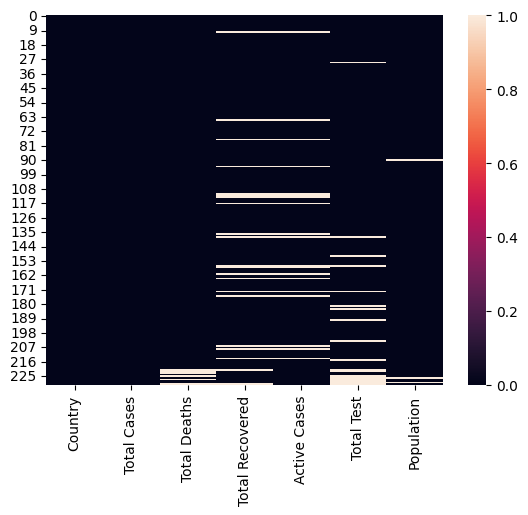

In [13]:
sns.heatmap(dataset.isnull())

In [14]:
dataset[dataset['Population'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
226,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
229,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [15]:
dataset.loc[226,'Population'] = 2666
dataset.loc[90,'Population'] = 1425182746
dataset.loc[230, 'Population'] = 2047

In [16]:
dataset.isnull().sum()

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          1
dtype: int64

In [17]:
dataset[dataset['Total Deaths'].isnull()]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
221,Tuvalu,2805.0,NaN,NaN,2805.0,NaN,12066.0
222,Saint Helena,2166.0,NaN,2.0,2164.0,NaN,6115.0
223,Falkland Islands,1930.0,NaN,1930.0,0.0,8632.0,3539.0
225,Niue,747.0,NaN,746.0,1.0,NaN,1622.0
227,Vatican City,29.0,NaN,29.0,0.0,NaN,799.0
230,Tokelau,5.0,NaN,NaN,5.0,NaN,2047.0


In [18]:
dataset['Total Deaths'].fillna(0).inplace=True

In [19]:
dataset.dropna(inplace = True)

In [20]:
dataset.Country.describe()

count     196
unique    196
top       USA
freq        1
Name: Country, dtype: object

In [21]:
dataset.isnull().sum()/dataset.shape[0]*100

Country            0.0
Total Cases        0.0
Total Deaths       0.0
Total Recovered    0.0
Active Cases       0.0
Total Test         0.0
Population         0.0
dtype: float64

# Analysis of different factors

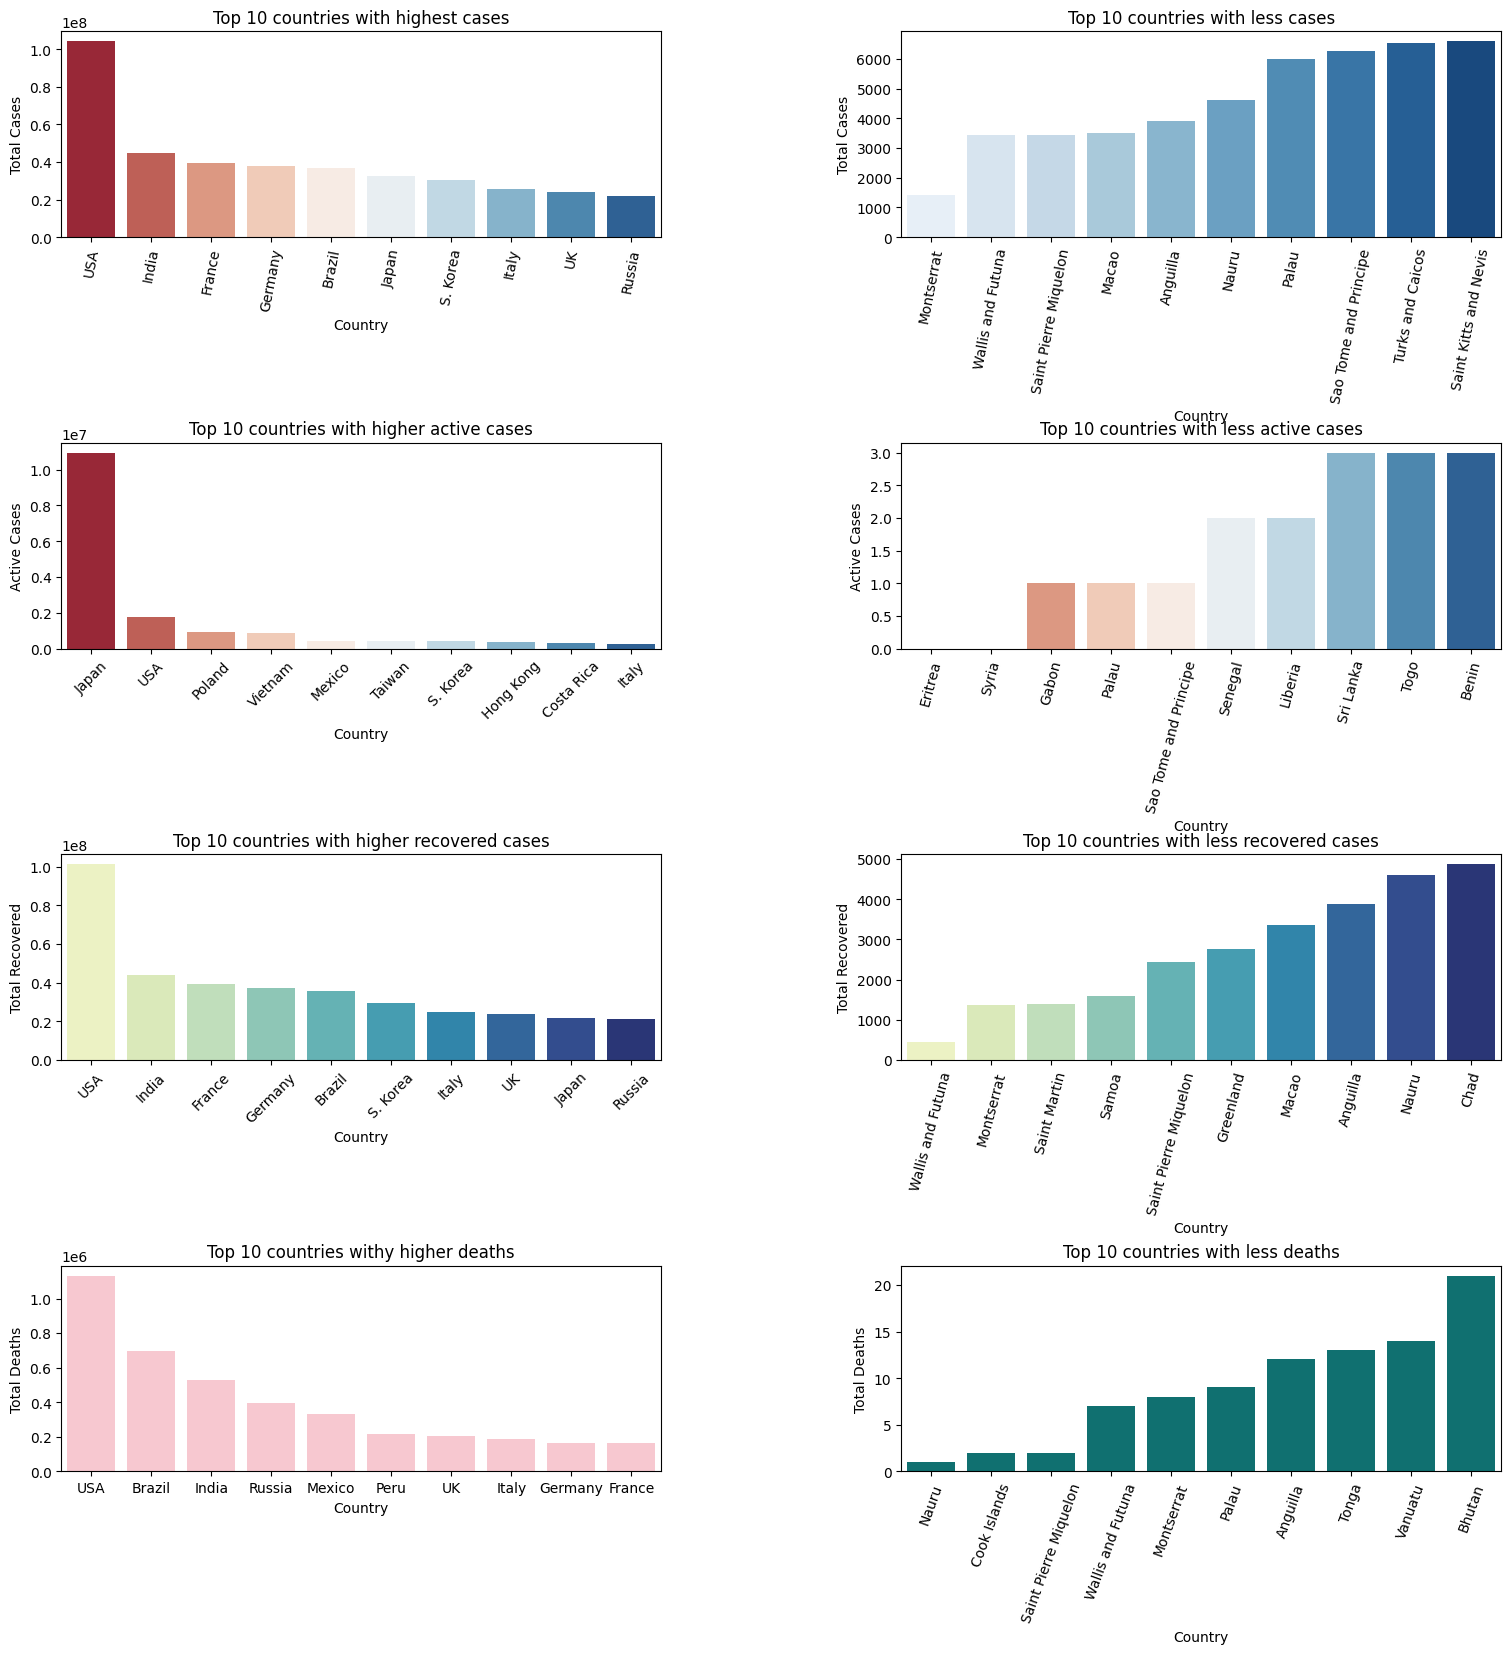

In [22]:
plt.figure(figsize = (18,18))


plt.subplot(4,2,1)
top_cases = dataset[['Country', 'Total Cases']].sort_values(by = 'Total Cases', ascending = False)[:10]
top_cases
sns.barplot(top_cases, x = "Country", y = "Total Cases", palette = "RdBu")
plt.title("Top 10 countries with highest cases")
plt.xticks(rotation = 79)

plt.subplot(4,2,2)
less_cases = dataset[['Country', 'Total Cases']].sort_values(by = 'Total Cases', ascending = True)[:10]
less_cases
sns.barplot(less_cases, x = "Country", y = "Total Cases", palette = "Blues", width = 0.8)
plt.title("Top 10 countries with less cases")
plt.xticks(rotation = 79)

plt.subplot(4,2,3)
greater_active_cases = dataset[['Country', 'Active Cases']].sort_values(by = 'Active Cases', ascending = False)[:10]
greater_active_cases
sns.barplot(greater_active_cases, x = "Country", y = "Active Cases", palette = "RdBu", width = 0.8)
plt.title("Top 10 countries with higher active cases")
plt.xticks(rotation = 45)

plt.subplot(4,2,4)
controlable_active_cases = dataset[['Country', 'Active Cases']].sort_values(by = 'Active Cases', ascending = True)[:10]
controlable_active_cases
sns.barplot(controlable_active_cases, x = "Country", y = "Active Cases", palette = "RdBu", width = 0.8)
plt.title("Top 10 countries with less active cases")
plt.xticks(rotation = 75)

plt.subplot(4,2,5)
high_recovered_cases = dataset[['Country', 'Total Recovered']].sort_values(by = 'Total Recovered', ascending = False)[:10]
high_recovered_cases
sns.barplot(high_recovered_cases, x = "Country", y = "Total Recovered", palette = "YlGnBu", width = 0.8)
plt.title("Top 10 countries with higher recovered cases")
plt.xticks(rotation = 45)

plt.subplot(4,2,6)
less_recovered_cases = dataset[['Country', 'Total Recovered']].sort_values(by = 'Total Recovered', ascending = True)[:10]
less_recovered_cases
sns.barplot(less_recovered_cases, x = "Country", y = "Total Recovered", palette = "YlGnBu", width = 0.8)
plt.title("Top 10 countries with less recovered cases")
plt.xticks(rotation = 75)

plt.subplot(4,2,7)
top_deaths = dataset[['Country', 'Total Deaths']].sort_values(by = 'Total Deaths', ascending = False)[:10]
top_deaths
sns.barplot(top_deaths, x = "Country", y = "Total Deaths", color = 'pink', width = 0.8)
plt.title("Top 10 countries withy higher deaths")

plt.subplot(4,2,8)
less_deaths = dataset[['Country', 'Total Deaths']].sort_values(by = 'Total Deaths', ascending = True)[:10]
less_deaths
sns.barplot(less_deaths, x = 'Country', y = 'Total Deaths', color = 'teal', width = 0.8)
plt.title("Top 10 countries with less deaths")
plt.xticks(rotation = 70)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)

In [23]:
if ('Fulklands Islands') in dataset['Country']:
    print("yes")
else:
    print('no')

no


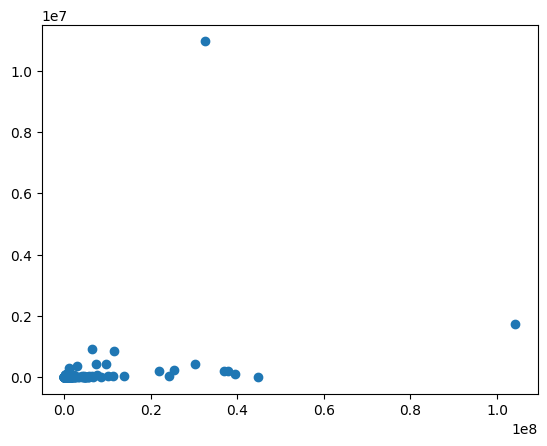

In [24]:
plt.scatter(dataset['Total Cases'], dataset['Active Cases'])
plt.show()